## Predictive Analytics: U.S. retail sales

You will be using the dataset us_retail_sales.csv for this assignment. This data gives the total monthly retail sales in the US from January 1992 until June 2021. With this dataset, complete the following steps:
1. Plot the data with proper labeling and make some observations on the graph.
2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.
3. Use the training set to build a predictive model for the monthly retail sales.
4. Use the model to predict the monthly retail sales on the last year of data.
5. Report the RMSE of the model predictions on the test set.

In [1]:
# Load the Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
#!pip install statsmodels

In [3]:
# 1. Load the dataset as a Pandas data frame.
# 2. Display the first ten rows of data.
# Read  US retails sales  data file ('als_data.csv') from local:
directory = '/Users/rajibsamanta/Documents/Rajib/College/Sem 7 Winter 2023/Week8' 
# Set the working directory
os.chdir(directory)
print(os.getcwd())
dataset1_csv = pd.read_csv("us_retail_sales.csv")
dataset1_csv.head(5)
# Display the DataFrame 10 rows

/Users/rajibsamanta/Documents/Rajib/College/Sem 7 Winter 2023/Week8


YEAR     JAN     FEB     MAR     APR     MAY     JUN       JUL       AUG  \
0  1992  146925  147223  146805  148032  149010  149800  150761.0  151067.0   
1  1993  157555  156266  154752  158979  160605  160127  162816.0  162506.0   
2  1994  167518  169649  172766  173106  172329  174241  174781.0  177295.0   
3  1995  182413  179488  181013  181686  183536  186081  185431.0  186806.0   
4  1996  189135  192266  194029  194744  196205  196136  196187.0  196218.0   

        SEP       OCT       NOV       DEC  
0  152588.0  153521.0  153583.0  155614.0  
1  163258.0  164685.0  166594.0  168161.0  
2  178787.0  180561.0  180703.0  181524.0  
3  187366.0  186565.0  189055.0  190774.0  
4  198859.0  200509.0  200174.0  201284.0

In [4]:
#Information about dataframe
dataset1_csv.info()

# --> It has 30 RangeIndex and 13 olumns( Year and 12 months), JUl to DEC has one NaN Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    30 non-null     int64  
 1   JAN     30 non-null     int64  
 2   FEB     30 non-null     int64  
 3   MAR     30 non-null     int64  
 4   APR     30 non-null     int64  
 5   MAY     30 non-null     int64  
 6   JUN     30 non-null     int64  
 7   JUL     29 non-null     float64
 8   AUG     29 non-null     float64
 9   SEP     29 non-null     float64
 10  OCT     29 non-null     float64
 11  NOV     29 non-null     float64
 12  DEC     29 non-null     float64
dtypes: float64(6), int64(7)
memory usage: 3.2 KB


In [5]:
#dataset1_csv.describe

In [6]:
dataset1_csv.shape
#-- Total 360 rows

(30, 13)

In [7]:
dataset1_csv.tail(10)
# JUl to DEC has one Nan Value for 2021

YEAR     JAN     FEB     MAR     APR     MAY     JUN       JUL       AUG  \
20  2012  352862  357379  358719  356849  356018  352043  353891.0  358450.0   
21  2013  367009  372291  369081  367514  369493  371041  373554.0  372489.0   
22  2014  373033  378581  382601  386689  387100  388106  388359.0  391305.0   
23  2015  385648  385157  391420  391356  394718  395464  398193.0  398105.0   
24  2016  394749  398105  396911  398190  400143  404756  403730.0  403968.0   
25  2017  416081  415503  414620  416889  414540  416505  416744.0  417179.0   
26  2018  432148  434106  433232  435610  439996  438191  440703.0  439278.0   
27  2019  440751  439996  447167  448709  449552  450927  454012.0  456500.0   
28  2020  460586  459610  434281  379892  444631  476343  481627.0  483716.0   
29  2021  520162  504458  559871  562269  548987  550782       NaN       NaN   

         SEP       OCT       NOV       DEC  
20  361470.0  361991.0  362876.0  364488.0  
21  372505.0  373663.0  373914.0  377032.0  
22  389860.0  390506.0  391805.0  388569.0  
23  396248.0  394503.0  396240.0  397052.0  
24  405958.0  407395.0  406061.0  412610.0  
25  426501.0  426933.0  431158.0  433282.0  
26  438985.0  444038.0  445242.0  434803.0  
27  452849.0  455486.0  457658.0  458055.0  
28  493327.0  493991.0  488652.0  484782.0  
29       NaN       NaN       NaN       NaN

In [8]:
# Creating a one-dimensional dataset of the sales data
dataset1_csv = pd.melt(dataset1_csv, id_vars=["YEAR"],var_name="Month",value_name="Sales")
dataset1_csv.head()

YEAR Month     Sales
0  1992   JAN  146925.0
1  1993   JAN  157555.0
2  1994   JAN  167518.0
3  1995   JAN  182413.0
4  1996   JAN  189135.0

In [9]:
# Covert the month values as numeric
dataset1_csv["Month"].replace({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,'MAY': 5,'JUN': 6, 'JUL': 7,'AUG': 8,'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC':12}, inplace=True)
dataset1_csv.head()

YEAR  Month     Sales
0  1992      1  146925.0
1  1993      1  157555.0
2  1994      1  167518.0
3  1995      1  182413.0
4  1996      1  189135.0

In [10]:
# Creating a new feature 'Date' based on the Year and Month fields (day value␣ ↪set to 1)
dataset1_csv['Date'] = pd.to_datetime(dataset1_csv[['YEAR', 'Month']].assign(DAY=1))
dataset1_csv.head()

#--> Now date and sales columns is sufficient for data analysis.

YEAR  Month     Sales       Date
0  1992      1  146925.0 1992-01-01
1  1993      1  157555.0 1993-01-01
2  1994      1  167518.0 1994-01-01
3  1995      1  182413.0 1995-01-01
4  1996      1  189135.0 1996-01-01

In [11]:
# Sorting the dataset on date and resetting the index values
dataset1_csv = dataset1_csv.sort_values(by=['Date'])
dataset1_csv = dataset1_csv.reset_index(drop=True) 
dataset1_csv.head()

YEAR  Month     Sales       Date
0  1992      1  146925.0 1992-01-01
1  1992      2  147223.0 1992-02-01
2  1992      3  146805.0 1992-03-01
3  1992      4  148032.0 1992-04-01
4  1992      5  149010.0 1992-05-01

In [12]:
dataset1_csv.tail(10)

YEAR  Month     Sales       Date
350  2021      3  559871.0 2021-03-01
351  2021      4  562269.0 2021-04-01
352  2021      5  548987.0 2021-05-01
353  2021      6  550782.0 2021-06-01
354  2021      7       NaN 2021-07-01
355  2021      8       NaN 2021-08-01
356  2021      9       NaN 2021-09-01
357  2021     10       NaN 2021-10-01
358  2021     11       NaN 2021-11-01
359  2021     12       NaN 2021-12-01

In [13]:
# Dropping all the nulls in the dataset
dataset1_csv.dropna(inplace=True)
dataset1_csv.tail(5)
# remove rows for JUl to DEC as it has Nan Value for 2021

YEAR  Month     Sales       Date
349  2021      2  504458.0 2021-02-01
350  2021      3  559871.0 2021-03-01
351  2021      4  562269.0 2021-04-01
352  2021      5  548987.0 2021-05-01
353  2021      6  550782.0 2021-06-01

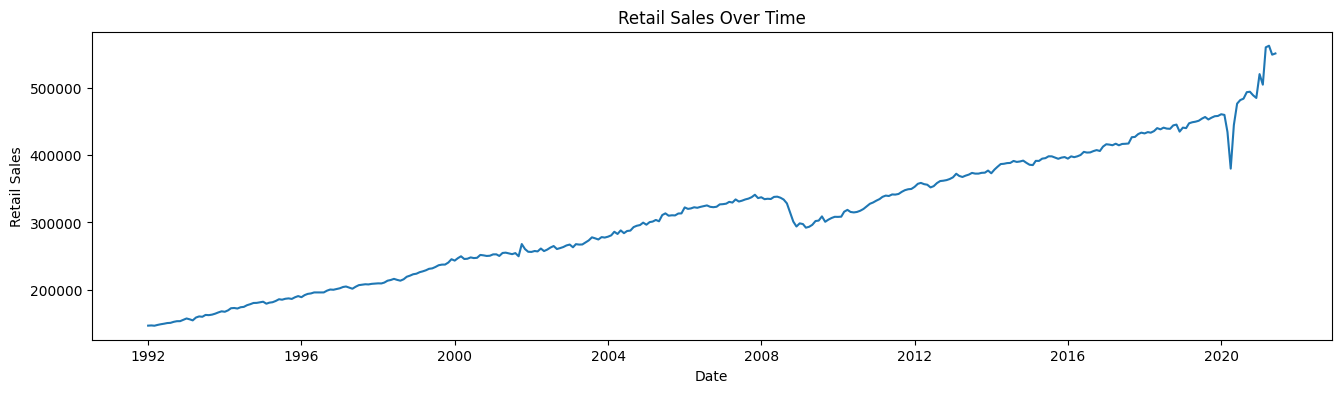

In [14]:
# Q01: Plot the data with proper labeling and make some observations on the␣ ↪graph.
x = dataset1_csv.Date
y = dataset1_csv.Sales
plt.figure(figsize=(16, 4))
plt.plot(x, y)
plt.xlabel("Date")
plt.ylabel("Retail Sales")
plt.title("Retail Sales Over Time")
plt.show()

The above graph illustrates that the retail sales in the United States spanning from 1992 to 2021. The depicted trend line indicates a general upward trajectory in retail sales over the years, albeit with occasional fluctuations. 
In the year 2008 the sales drop ,this reminds the economic recession during 2008 and 2009. Again from 2009 sales growth uptrend until 2020. 
In the Year 2020 the sales drop drastically , this indicate the starting of COVID-19 pandemic where people were stuck at home and everyone staying in-home and just survived with basic minimum foods and clothes.
The upward trajectory of retail sales regained momentum from end of 2020 when online delivery started, and people consciously started going outside.

In [15]:
# Q02: Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data
#       as your test set and the rest as your training set.
## As the data set has upto Jun 2021 data , use below filter condition to split the data set
train_set = dataset1_csv[dataset1_csv['Date'] < '2020-07-01']
test_set = dataset1_csv[dataset1_csv['Date'] >= '2020-07-01']

In [16]:
test_set.head(10)

YEAR  Month     Sales       Date
342  2020      7  481627.0 2020-07-01
343  2020      8  483716.0 2020-08-01
344  2020      9  493327.0 2020-09-01
345  2020     10  493991.0 2020-10-01
346  2020     11  488652.0 2020-11-01
347  2020     12  484782.0 2020-12-01
348  2021      1  520162.0 2021-01-01
349  2021      2  504458.0 2021-02-01
350  2021      3  559871.0 2021-03-01
351  2021      4  562269.0 2021-04-01

In [17]:
# Q03: Use the training set to build a predictive model for the monthly retail sales.
# Feature Engineering: Extract year and month
# Define features (X) and target variable (y)
X = train_set[['YEAR', 'Month']]
y = train_set['Sales']
# Split the training set further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
predictions = model.predict(X_val)

Root Mean Squared Error on Validation Set: 13602.103797251058


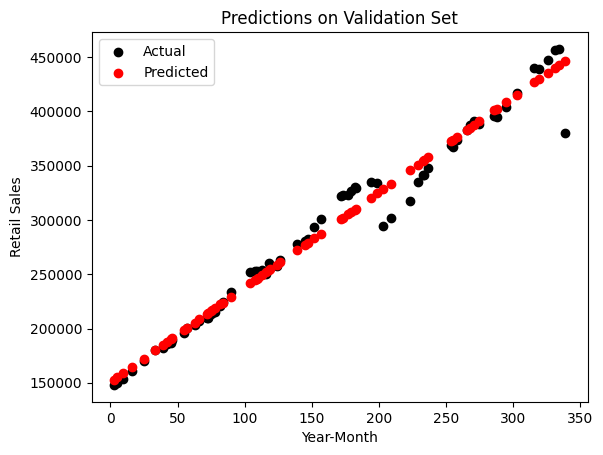

In [18]:
# Evaluate the model
mse = mean_squared_error(y_val, predictions)
print(f'Root Mean Squared Error on Validation Set: {np.sqrt(mse)}')

# Plot predictions vs. actual values
plt.scatter(X_val.index, y_val, color='black', label='Actual')
plt.scatter(X_val.index, predictions, color='red', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Retail Sales')
plt.title('Predictions on Validation Set')
plt.legend()
plt.show()

Root Mean Squared Error (RMSE) is 13602 which is very high which means the performance of the models is not perfect.

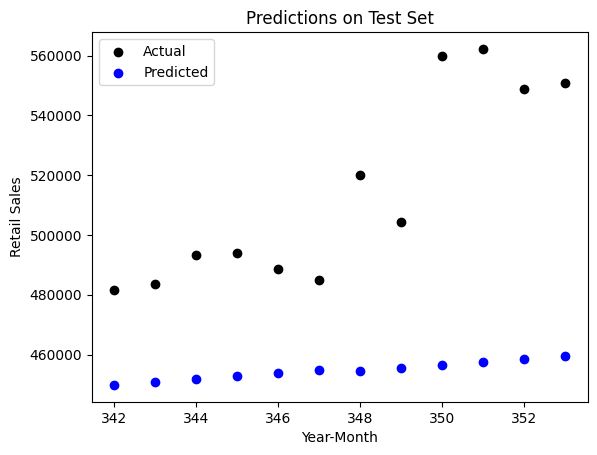

In [19]:
## Q04:Use the model to predict the monthly retail sales on the last year of data.
# Define features for the test set
X_test = test_set[['YEAR', 'Month']]

# Use the trained model to make predictions on the test set
predictions_test = model.predict(X_test)

# Plot predictions vs. actual values for the test set
plt.scatter(test_set.index, test_set['Sales'], color='black', label='Actual')
plt.scatter(test_set.index, predictions_test, color='blue', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Retail Sales')
plt.legend()
plt.title('Predictions on Test Set')
plt.show()

* While we run the prediction model on Test data ( only last one year data) ,looks like the prediction value and actuals has huge difference. We need to look for another model to increase the model accuracy.

/Users/rajibsamanta/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Root Mean Squared Error (ARIMA): 52918.21753163926


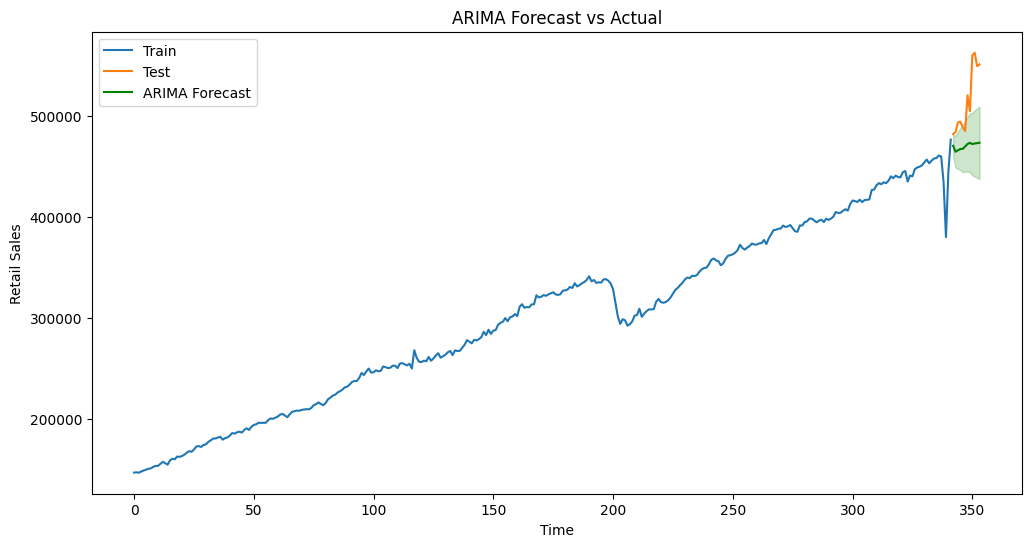

In [20]:
# As in the initial plot it does not clearly indicate seasonal pattern, 
# lets evaluate ARIMA (AutoRegressive Integrated Moving Average) model

# Fit ARIMA model
order = (12, 1, 12)  # Replace with appropriate order (p, d, q)
arima_model = ARIMA(train_set['Sales'], order=order)
arima_result = arima_model.fit()
# Forecast using the ARIMA model
arima_predictions = arima_result.get_forecast(steps=len(test_set))
arima_mean = arima_predictions.predicted_mean
arima_conf_int = arima_predictions.conf_int()

# Calculate Mean Squared Error
mse_arima = mean_squared_error(test_set['Sales'], arima_mean)
print(f'Root Mean Squared Error (ARIMA): {np.sqrt(mse_arima)}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['Sales'], label='Train')
plt.plot(test_set.index, test_set['Sales'], label='Test')
plt.plot(test_set.index, arima_mean, label='ARIMA Forecast', color='green')
plt.fill_between(test_set.index, arima_conf_int.iloc[:, 0], arima_conf_int.iloc[:, 1], color='green', alpha=0.2)
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Retail Sales')
plt.legend()
plt.show()


Even using ARIMA model the actaul and prediction values have significant difference. Lets try Holt-Winters Exponential Smoothing model

Root Mean Squared Error (Holt-Winters): 49982.09052947421


/Users/rajibsamanta/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


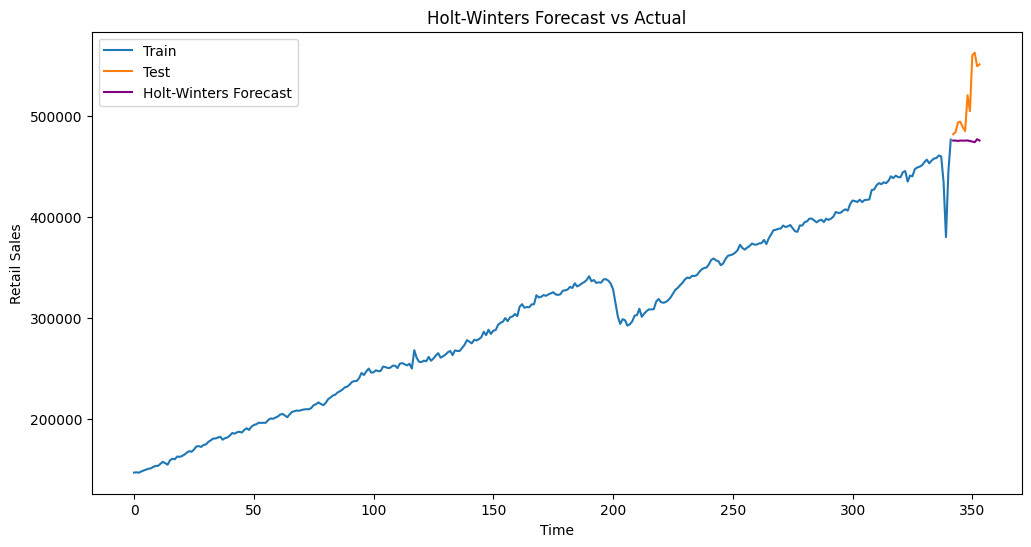

In [21]:
# Fit Holt-Winters Exponential Smoothing model
holt_winters_model = ExponentialSmoothing(train_set['Sales'], seasonal='add', seasonal_periods=12)
holt_winters_result = holt_winters_model.fit()

# Forecast using the Holt-Winters model
hw_predictions = holt_winters_result.forecast(steps=len(test_set))

# Calculate prediction intervals manually
alpha = 0.05  # Confidence level
#hw_forecast, hw_stderr, hw_conf_int = holt_winters_result.forecast(steps=len(test_set), alpha=alpha)

# Calculate Mean Squared Error
mse_hw = mean_squared_error(test_set['Sales'], hw_predictions)
print(f'Root Mean Squared Error (Holt-Winters): {np.sqrt(mse_hw)}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train_set.index, train_set['Sales'], label='Train')
plt.plot(test_set.index, test_set['Sales'], label='Test')
plt.plot(test_set.index, hw_predictions, label='Holt-Winters Forecast', color='purple')
#plt.fill_between(test_set.index, hw_conf_int[:, 0], hw_conf_int[:, 1], color='purple', alpha=0.2, label=f'95% Prediction Interval')
plt.title('Holt-Winters Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Retail Sales')
plt.legend()
plt.show()

None of the above model’s accuracy is good enough to describe the last one-year sales data which happen after COVID-19 slow down and suddenly the sales growth spike hugely, none of the above model could predict accurately.